In [1]:
# load necessary packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [79]:
# functions for reusing
def read_GSEA(inpath):
    '''
    function to read GSEA xls result
    (The result is said to be xls but is actually a csv)
    (**stupid**)
    '''
    data = pd.read_csv(inpath, sep='\t')
    data.drop(['GS DETAILS', 'GS<br> follow link to MSigDB'], axis=1, inplace=True)
    return data

def filter_data(df):
    '''
    function to filter data which is low in quality
    '''
    return df[(df['NES'] > 1.4) | (df['FDR q-val'] < 0.3)]

In [14]:
# load data
dataA = read_GSEA('../FinalReport/result/GSEA/A_vs_Control_onco/gsea_report_for_ClassA_1588140522718.xls')
dataB = read_GSEA('../FinalReport/result/GSEA/B_vs_Control_onco/gsea_report_for_ClassB_1588140445125.xls')

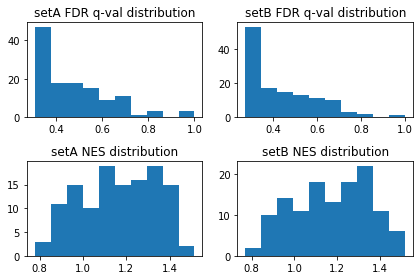

In [48]:
# view FDR distribution
fig, axes = plt.subplots(2,2)
axes[0][0].hist(dataA['FDR q-val'])
axes[0][0].set_title('setA FDR q-val distribution')
axes[0][1].hist(dataB['FDR q-val'])
axes[0][1].set_title('setB FDR q-val distribution')
axes[1][0].hist(dataA['NES'])
axes[1][0].set_title('setA NES distribution')
axes[1][1].hist(dataB['NES'])
axes[1][1].set_title('setB NES distribution')
fig.tight_layout()

In [80]:
dataA_filtered = filter_data(dataA)
dataB_filtered = filter_data(dataB)

In [83]:
gene_sets = np.intersect1d(dataA_filtered['NAME'], dataB_filtered['NAME'])

In [84]:
for geneset in gene_sets:
    print(geneset)

BMI1_DN_MEL18_DN.V1_DN
EGFR_UP.V1_DN
EIF4E_DN
ESC_V6.5_UP_LATE.V1_UP
KRAS.300_UP.V1_DN
KRAS.600.LUNG.BREAST_UP.V1_DN
KRAS.600_UP.V1_DN
MYC_UP.V1_DN
SNF5_DN.V1_DN
TBK1.DN.48HRS_UP
YAP1_UP
